In [32]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_train_thres_0.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_train_thres_0.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_valid_thres_0.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_valid_thres_0.npy')
X_test = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_test_thres_0.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_test_thres_0.npy')

"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [34]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [35]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)

In [39]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)

Training model...
Train on 56580 samples, validate on 33872 samples
Epoch 1/100
56580/56580 [==============================] - 2s - loss: 1.3509 - val_loss: 0.6803
Epoch 0: validation loss: 0.680
Balanced Accuracy: 55.96%	 auROC: 0.586	 auPRC: 0.591	 auPRG: 0.151
Recall at 5%|10%|20% FDR: 0.5%|0.8%|1.8%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 2/100
56580/56580 [==============================] - 1s - loss: 1.3477 - val_loss: 0.6805
Epoch 1: validation loss: 0.681
Balanced Accuracy: 56.24%	 auROC: 0.586	 auPRC: 0.589	 auPRG: 0.149
Recall at 5%|10%|20% FDR: 0.5%|0.6%|2.4%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 3/100
56580/56580 [==============================] - 1s - loss: 1.3454 - val_loss: 0.6805
Epoch 2: validation loss: 0.681
Balanced Accuracy: 55.90%	 auROC: 0.586	 auPRC: 0.591	 auPRG: 0.151
Recall at 5%|10%|20% FDR: 0.6%|0.8%|2.1%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 4/100
56580/56580 [==============================] - 1s - loss: 1.3439 - v

In [40]:
print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))

Balanced Accuracy: 56.81%	 auROC: 0.597	 auPRC: 0.600	 auPRG: 0.176
Recall at 5%|10%|20% FDR: 0.3%|0.7%|3.6%	 Num Positives: 11292	 Num Negatives: 11292	 


In [41]:
print(dnn_normalized.test(X_train_normalized[:, :, :10:, :], y_train))

Balanced Accuracy: 59.70%	 auROC: 0.642	 auPRC: 0.643	 auPRG: 0.269
Recall at 5%|10%|20% FDR: 1.4%|2.7%|8.9%	 Num Positives: 28290	 Num Negatives: 28290	 


In [42]:
print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))

Balanced Accuracy: 56.07%	 auROC: 0.590	 auPRC: 0.594	 auPRG: 0.158
Recall at 5%|10%|20% FDR: 0.6%|0.7%|2.7%	 Num Positives: 16936	 Num Negatives: 16936	 


In [43]:
pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [44]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)

In [49]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)

Training model...
Train on 56580 samples, validate on 33872 samples
Epoch 1/100
56580/56580 [==============================] - 1s - loss: 1.3199 - val_loss: 0.6800
Epoch 0: validation loss: 0.680
Balanced Accuracy: 56.59%	 auROC: 0.594	 auPRC: 0.594	 auPRG: 0.171
Recall at 5%|10%|20% FDR: 0.4%|0.7%|1.6%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 2/100
56580/56580 [==============================] - 1s - loss: 1.3187 - val_loss: 0.6810
Epoch 1: validation loss: 0.681
Balanced Accuracy: 56.70%	 auROC: 0.596	 auPRC: 0.596	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.5%|0.8%|2.2%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 3/100
56580/56580 [==============================] - 1s - loss: 1.3165 - val_loss: 0.6813
Epoch 2: validation loss: 0.681
Balanced Accuracy: 56.91%	 auROC: 0.598	 auPRC: 0.598	 auPRG: 0.177
Recall at 5%|10%|20% FDR: 0.5%|0.7%|2.2%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 4/100
56580/56580 [==============================] - 1s - loss: 1.3140 - v

In [50]:
print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))

Balanced Accuracy: 56.81%	 auROC: 0.594	 auPRC: 0.589	 auPRG: 0.176
Recall at 5%|10%|20% FDR: 0.4%|0.7%|1.1%	 Num Positives: 11292	 Num Negatives: 11292	 


# with distance only

In [51]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [64]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 56580 samples, validate on 33872 samples
Epoch 1/100
56580/56580 [==============================] - 1s - loss: 1.3761 - val_loss: 0.6894
Epoch 0: validation loss: 0.689
Balanced Accuracy: 53.36%	 auROC: 0.548	 auPRC: 0.540	 auPRG: 0.091
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 2/100
56580/56580 [==============================] - 1s - loss: 1.3763 - val_loss: 0.6890
Epoch 1: validation loss: 0.689
Balanced Accuracy: 53.74%	 auROC: 0.551	 auPRC: 0.541	 auPRG: 0.099
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 3/100
56580/56580 [==============================] - 1s - loss: 1.3762 - val_loss: 0.6889
Epoch 2: validation loss: 0.689
Balanced Accuracy: 53.81%	 auROC: 0.554	 auPRC: 0.542	 auPRG: 0.103
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.1%	 Num Positives: 16936	 Num Negatives: 16936	 

Epoch 4/100
56580/56580 [==============================] - 1s - loss: 1.3763 - v

ValueError: I/O operation on closed file

In [ ]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

# Print prediction

In [65]:
indx_train = np.load('/users/mtaranov/NN_thres5max/dist_matched/indx_train_thres_0.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max/dist_matched/indx_valid_thres_0.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max/dist_matched/indx_test_thres_0.npy')

In [66]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [67]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [68]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


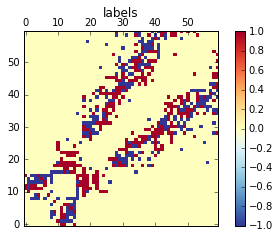

0.862488806248
(60, 60)
Limit: 0.862488806248


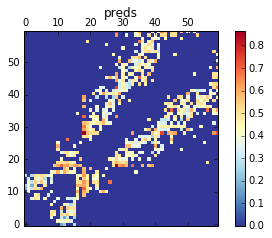

In [83]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )

1.0
(400, 400)
Limit: 1.0


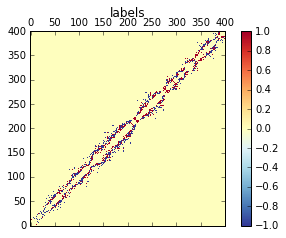

0.875868916512
(400, 400)
Limit: 0.875868916512


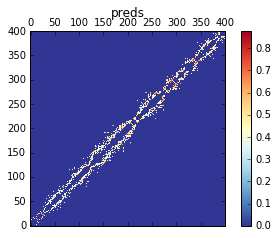

In [81]:
zoomIn_window = (200,600)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )

1.0
(2272, 2272)
Limit: 1.0


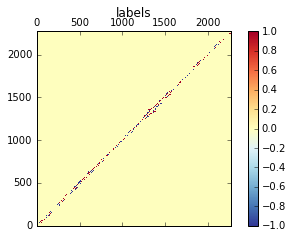

0.997297823429
(2272, 2272)
Limit: 0.997297823429


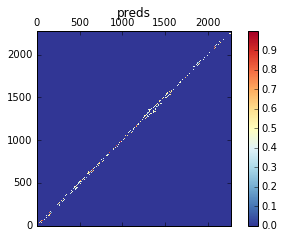

In [76]:
zoomIn_window = (0,2272)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )